In [40]:
import yfinance as yf
import os
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from pandas_datareader.oecd import OECDReader
from yahooquery import Ticker
import warnings
import logging
from transformers import BertTokenizer, BertModel, logging as transformers_logging
from sklearn.neural_network import BernoulliRBM
import torch
import numpy as np
import pandas as pd
os.getcwd()

'/Users/xiaobinlu/pytorch-test/Stock_econ_company'

In [47]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 31)

companies = [
    "AAPL", "MSFT", "AMZN", "NVDA", "GOOGL", "GOOG", "META", "TSLA", "UNH",
    "LLY", "JNJ", "XOM", "V", "JPM", "PG", "MA", "HD", "MRK", "PEP",
    "CVX", "ABBV", "AVGO", "KO", "COST", "MCD", "TMO", "ORCL", "WMT", "ADBE",
    "LIN", "ACN", "NKE", "TXN", "MDT", "PM", "NFLX", "ABT", "UPS", "HON",
    "DHR", "AMD", "SCHW", "RTX", "BMY", "QCOM", "PFE", "LOW", "SPGI", "AMGN",
    "UNP", "T", "MS", "AMT", "CAT", "LMT", "GILD", "ELV", "INTU", "ZTS",
    "DE", "C", "ISRG", "MMC", "AXP", "BLK", "F", "MDLZ", "ADP",
    "SYK", "MU", "NOC", "GM", "LRCX", "APD", "KMB", "CCI", "SLB",
    "EW", "HCA", "SO", "CSCO", "PLD", "CB", "CI", "ITW", "WM", "CL",
    "STZ", "NEE", "CDNS", "DG", "VRTX", "GIS", "TGT", "ADM", "D", "EMR"
]



In [2]:
len(companies)

68

In [1]:
companies = [
    "ORLY", "EOG", "SHW", "USB", "ADI", "NSC", "REGN", "PGR", "EQIX", "MPC",
    "BDX", "TRV", "TFC", "AON", "AEP", "CTVA", "BSX", "MO", "FDX", "APTV",
    "SBUX", "PSA", "MET", "DXCM", "MRNA", "IDXX", "KLAC", "KHC", "SPG", "MCK",
    "PSX", "WMG", "WBA", "PANW", "AFL", "IT", "CHTR", "ALL", "STT", "ICE",
    "OXY", "CME", "PNC", "CTAS", "GLW", "EWBC", "LUV", "KR", "AIG", "DOW",
    "PPG", "WELL", "ROP", "TT", "BAX", "HAL", "CNC", "DHI", "HPQ",
    "MTD", "ROK", "FTNT", "SRE", "VLO", "WMB", "LYB", "HSY", "WEC"
]



In [52]:
directory_path = "./US"
for company in companies:
    tick = yf.Ticker(company)
    data = tick.history(start=start_date, end=end_date)
    data['Company'] = company
    data.index.name = 'Date'
    data.reset_index(inplace=True)
    data['Date'] = pd.to_datetime(data['Date']).dt.date
    print(tick.ticker,data.shape[0])
    filename = os.path.join(directory_path, tick.ticker + ".csv")
    data.to_csv(filename, index=False)
    
print("Data Import Done.")

ORLY 1006
EOG 1006
SHW 1006
USB 1006
ADI 1006
NSC 1006
REGN 1006
PGR 1006
EQIX 1006
MPC 1006
BDX 1006
TRV 1006
TFC 1006
AON 1006
AEP 1006
CTVA 1006
BSX 1006
MO 1006
FDX 1006
APTV 1006
SBUX 1006
PSA 1006
MET 1006
DXCM 1006
MRNA 1006
IDXX 1006
KLAC 1006
KHC 1006
SPG 1006
MCK 1006
PSX 1006
WMG 901
WBA 1006
PANW 1006
AFL 1006
IT 1006
CHTR 1006
ALL 1006
STT 1006
ICE 1006
OXY 1006
CME 1006
PNC 1006
CTAS 1006
GLW 1006
EWBC 1006
LUV 1006
KR 1006
AIG 1006
DOW 1006
PPG 1006
WELL 1006


$TWTR: possibly delisted; no timezone found


TWTR 0
ROP 1006
TT 1006
BAX 1006
HAL 1006
CNC 1006
DHI 1006
HPQ 1006
MTD 1006
ROK 1006
FTNT 1006


$ABC: possibly delisted; no timezone found


ABC 0
SRE 1006
VLO 1006
WMB 1006
LYB 1006
HSY 1006
WEC 1006
Data Import Done.


In [8]:
pd.read_csv(os.path.join("./US","BAC.csv"))

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2020-01-02,31.595114,31.872187,31.541489,31.854311,37614200,0.0,0.0,BAC
1,2020-01-03,31.264417,31.416362,31.067785,31.192917,50357900,0.0,0.0,BAC
2,2020-01-06,30.754962,31.192916,30.719210,31.148224,42185000,0.0,0.0,BAC
3,2020-01-07,31.014167,31.210797,30.862223,30.942663,34149000,0.0,0.0,BAC
4,2020-01-08,30.897978,31.452121,30.880102,31.255491,45311600,0.0,0.0,BAC
...,...,...,...,...,...,...,...,...,...
1001,2023-12-22,32.778330,33.232350,32.768462,32.995472,37258100,0.0,0.0,BAC
1002,2023-12-26,33.015217,33.518586,32.936255,33.419888,24845400,0.0,0.0,BAC
1003,2023-12-27,33.360662,33.508713,33.222482,33.400143,24498600,0.0,0.0,BAC
1004,2023-12-28,33.380403,33.528455,33.331054,33.439625,21799600,0.0,0.0,BAC


In [54]:
directory_path = "./US"

tickers_with_zero_splits_only = []
for ii in companies:
    filename = os.path.join(directory_path, ii + ".csv")  
    temp = pd.read_csv(filename)
    if not (temp['Stock Splits'] != 0.0).any():
        tickers_with_zero_splits_only.append(ii)
print(len(companies))
print(len(tickers_with_zero_splits_only))

68
61


In [55]:
tickers_with_zero_splits_only

['ORLY',
 'EOG',
 'USB',
 'ADI',
 'NSC',
 'REGN',
 'PGR',
 'EQIX',
 'MPC',
 'TRV',
 'TFC',
 'AON',
 'AEP',
 'CTVA',
 'BSX',
 'MO',
 'FDX',
 'APTV',
 'SBUX',
 'PSA',
 'MET',
 'MRNA',
 'IDXX',
 'KLAC',
 'KHC',
 'SPG',
 'MCK',
 'PSX',
 'WMG',
 'WBA',
 'AFL',
 'IT',
 'CHTR',
 'ALL',
 'STT',
 'ICE',
 'OXY',
 'CME',
 'PNC',
 'CTAS',
 'GLW',
 'EWBC',
 'LUV',
 'KR',
 'AIG',
 'DOW',
 'PPG',
 'WELL',
 'ROP',
 'BAX',
 'HAL',
 'CNC',
 'DHI',
 'HPQ',
 'MTD',
 'ROK',
 'VLO',
 'WMB',
 'LYB',
 'HSY',
 'WEC']

In [56]:
import ta as ta
from ta.volatility import BollingerBands
from ta.trend import sma_indicator
from ta.momentum import RSIIndicator
from ta.volume import OnBalanceVolumeIndicator
def toPercentage(iVal, fVal):
    return((fVal-iVal)/iVal) * 100
def calculate_indicators(df):
    
    df['mv100'] = sma_indicator(close=df["Close"], window=100)
    df['mv50'] = sma_indicator(close=df["Close"], window=50)
    df['mv9'] = sma_indicator(close=df["Close"], window=9)
    indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    rsi = RSIIndicator(close=df["Close"], window=14)
    df['rsi14'] = rsi.rsi()
    df['rsimv9'] = sma_indicator(close=df["rsi14"], window=9)
    rsi = RSIIndicator(close=df["Close"], window=50)
    df['rsi50'] = rsi.rsi()

    #df['h1'] = pd.DatetimeIndex(df['datetime']).hour # remove
    df['wd'] = pd.DatetimeIndex(df['Date']).weekday # keep it ?
    #df['h1'] = df.index.hour
    #df['wd'] = df.index.weekday
    df['f1'] = toPercentage(df.Open, df.Close)
    df['f2'] = toPercentage(df.Low, df.High)

    df['f3'] = toPercentage(df.Low.shift(), df.High.shift())
    df['f4'] = toPercentage(df.Low.shift(2), df.High.shift(2))
    df['f5'] = toPercentage(df.Low.shift(3), df.High.shift(3))
    df['f6'] = toPercentage(df.Low.shift(4), df.High.shift(4))

    df['f7'] = toPercentage(df.Open, df.High)
    df['f8'] = toPercentage(df.Close, df.High)
    df['f9'] = toPercentage(df.Low, df.Open)
    df['f10'] = toPercentage(df.Low, df.Close)

    # untouched 
    df['f11'] = toPercentage(df.Close, df.mv50)
    df['f12'] = toPercentage(df.Close, df.mv9)
    df['f13'] = toPercentage(df.Close, df.mv100)
    df['f14'] = toPercentage(df.mv9, df.mv50)
    df['f15'] = toPercentage(df.mv9, df.mv100)
    df['f16'] = toPercentage(df.mv50, df.mv100)
    df['f17'] = toPercentage(df.rsi14, df.rsi50)# fix the numbers 
    df['f18'] = toPercentage(df.rsi50, df.rsimv9)
    df['f19'] = toPercentage(df.Close, df.bb_bbm)
    df['f20'] = toPercentage(df.Close, df.bb_bbh)
    df['f21'] = toPercentage(df.Close, df.bb_bbl)
    df['f22'] = toPercentage(df.Close, df.mv100)
    df['f23'] = toPercentage(df.bb_bbl, df.bb_bbh)
    df['f24'] = toPercentage(df['Close'].rolling(window=20).max(), df['Close'])
    df['f25'] = toPercentage(df['Close'].rolling(window=50).max(), df['Close'])
    df['f26'] = toPercentage(df['Close'].rolling(window=100).max(), df['Close'])
    df['f27'] = toPercentage(df['Close'].rolling(window=20).min(), df['Close'])# fix the numbers 
    df['f28'] = toPercentage(df['Close'].rolling(window=50).min(), df['Close'])

    df['f29'] = toPercentage(df['Close'].shift(), df['Close'])  # %age change from previous value
    df['f30'] = toPercentage(df['Close'].shift(2), df['Close'])
    df['f31'] = toPercentage(df['Close'].shift(3), df['Close'])
    df['f32'] = toPercentage(df['Close'].shift(4), df['Close'])
    df['f33'] = toPercentage(df['Close'].shift(5), df['Close'])
    df['MF Multiplier'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    df['MF Volume'] = df['MF Multiplier'] * df['Volume']
    n = 10  
    #CMF
    df['f34'] = df['MF Volume'].rolling(window=n).sum() / df['Volume'].rolling(window=n).sum()
    #Dividend percentage
    df['f35']=df['Dividends']/df['Close']

In [57]:
dfs=[]
for ii in tickers_with_zero_splits_only:
    filename = os.path.join(directory_path, ii + ".csv")  # Construct the full path of the file
    temp = pd.read_csv(filename) 
    print(ii,temp.shape)
    temp['Next_Day_Close'] = temp['Close'].shift(-1)
    calculate_indicators(temp)
    temp=temp.dropna()
    print(ii,temp.shape)
    dfs.append(temp) 
merge = pd.concat(dfs)

ORLY (1006, 9)
ORLY (906, 57)
EOG (1006, 9)
EOG (906, 57)
USB (1006, 9)
USB (906, 57)
ADI (1006, 9)
ADI (906, 57)
NSC (1006, 9)
NSC (906, 57)
REGN (1006, 9)
REGN (906, 57)
PGR (1006, 9)
PGR (906, 57)
EQIX (1006, 9)
EQIX (906, 57)
MPC (1006, 9)
MPC (906, 57)
TRV (1006, 9)
TRV (906, 57)
TFC (1006, 9)
TFC (906, 57)
AON (1006, 9)
AON (906, 57)
AEP (1006, 9)
AEP (906, 57)
CTVA (1006, 9)
CTVA (906, 57)
BSX (1006, 9)
BSX (906, 57)
MO (1006, 9)
MO (906, 57)
FDX (1006, 9)
FDX (906, 57)
APTV (1006, 9)
APTV (906, 57)
SBUX (1006, 9)
SBUX (906, 57)
PSA (1006, 9)
PSA (906, 57)
MET (1006, 9)
MET (906, 57)
MRNA (1006, 9)
MRNA (906, 57)
IDXX (1006, 9)
IDXX (906, 57)
KLAC (1006, 9)
KLAC (906, 57)
KHC (1006, 9)
KHC (906, 57)
SPG (1006, 9)
SPG (906, 57)
MCK (1006, 9)
MCK (906, 57)
PSX (1006, 9)
PSX (906, 57)
WMG (901, 9)
WMG (801, 57)
WBA (1006, 9)
WBA (906, 57)
AFL (1006, 9)
AFL (906, 57)
IT (1006, 9)
IT (906, 57)
CHTR (1006, 9)
CHTR (906, 57)
ALL (1006, 9)
ALL (906, 57)
STT (1006, 9)
STT (906, 57)
ICE (

In [58]:
temp

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Next_Day_Close,...,f28,f29,f30,f31,f32,f33,MF Multiplier,MF Volume,f34,f35
99,2020-05-26,75.558541,76.969550,74.434961,74.635292,1380200,0.0,0.0,WEC,74.818207,...,21.784243,-0.522393,-1.142132,-1.844236,-1.153559,-2.202704,-0.841922,-1.162021e+06,0.225489,0.0
100,2020-05-27,75.541132,75.715327,73.616234,74.818207,1430900,0.0,0.0,WEC,77.492157,...,22.082710,0.245078,-0.278596,-0.899853,-1.603678,-0.911308,0.145231,2.078104e+05,0.273071,0.0
101,2020-05-28,76.220509,77.805715,75.689204,77.492157,1705300,0.0,0.0,WEC,79.896095,...,26.445860,3.573930,3.827767,3.285377,2.641917,1.912937,0.703703,1.200025e+06,0.268113,0.0
102,2020-05-29,77.117629,80.096420,76.838912,79.896095,2355900,0.0,0.0,WEC,81.115479,...,30.368425,3.102170,6.786969,7.048680,6.489465,5.826043,0.877008,2.066142e+06,0.302183,0.0
103,2020-06-01,79.817702,81.655496,79.155747,81.115479,1667100,0.0,0.0,WEC,81.847092,...,32.358123,1.526211,4.675727,8.416764,8.682469,8.114719,0.567943,9.468174e+05,0.167702,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2023-12-21,79.661056,80.398653,79.127262,79.923096,1994100,0.0,0.0,WEC,80.495705,...,4.430070,0.684688,-1.092967,-0.036404,-0.133388,-2.682581,0.251910,5.023343e+05,-0.140837,0.0
1001,2023-12-22,80.534527,81.301238,80.291894,80.495705,1419800,0.0,0.0,WEC,81.175072,...,5.178259,0.716450,1.406044,-0.384348,0.679785,0.582106,-0.596153,-8.464180e+05,-0.162117,0.0
1002,2023-12-26,80.311301,81.359475,80.262772,81.175072,1266800,0.0,0.0,WEC,80.990677,...,6.065941,0.843979,1.566476,2.261890,0.456387,1.529501,0.663714,8.407928e+05,-0.213897,0.0
1003,2023-12-27,81.078028,81.233309,80.602471,80.990677,1564400,0.0,0.0,WEC,81.572998,...,5.825005,-0.227157,0.614905,1.335761,2.029595,0.228194,0.230762,3.610041e+05,-0.117493,0.0


In [59]:
merge

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Next_Day_Close,...,f28,f29,f30,f31,f32,f33,MF Multiplier,MF Volume,f34,f35
99,2020-05-26,413.079987,416.190002,397.690002,399.119995,851000,0.0,0.0,ORLY,415.279999,...,52.966417,-1.449417,-1.276344,-1.962612,-2.601397,-2.627539,-0.845406,-719440.673828,-0.127424,0.0
100,2020-05-27,402.959991,416.290009,401.950012,415.279999,699700,0.0,0.0,ORLY,413.130005,...,59.159887,4.048909,2.540806,2.720887,2.006832,1.342184,0.859134,601135.981383,0.023009,0.0
101,2020-05-28,415.000000,417.790009,411.290009,413.130005,452800,0.0,0.0,ORLY,417.239990,...,58.335882,-0.517722,3.510225,2.009930,2.189078,1.478721,-0.433847,-196446.048678,0.029234,0.0
102,2020-05-29,414.820007,418.899994,411.950012,417.239990,562700,0.0,0.0,ORLY,417.600006,...,59.911072,0.994841,0.471969,4.539987,3.024766,3.205697,0.522300,293898.123274,-0.012109,0.0
103,2020-06-01,418.950012,422.760010,415.809998,417.600006,505800,0.0,0.0,ORLY,419.739990,...,60.049051,0.086285,1.081984,0.558661,4.630189,3.113661,-0.484891,-245257.631138,-0.188613,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2023-12-21,79.661056,80.398653,79.127262,79.923096,1994100,0.0,0.0,WEC,80.495705,...,4.430070,0.684688,-1.092967,-0.036404,-0.133388,-2.682581,0.251910,502334.257792,-0.140837,0.0
1001,2023-12-22,80.534527,81.301238,80.291894,80.495705,1419800,0.0,0.0,WEC,81.175072,...,5.178259,0.716450,1.406044,-0.384348,0.679785,0.582106,-0.596153,-846418.028963,-0.162117,0.0
1002,2023-12-26,80.311301,81.359475,80.262772,81.175072,1266800,0.0,0.0,WEC,80.990677,...,6.065941,0.843979,1.566476,2.261890,0.456387,1.529501,0.663714,840792.827050,-0.213897,0.0
1003,2023-12-27,81.078028,81.233309,80.602471,80.990677,1564400,0.0,0.0,WEC,81.572998,...,5.825005,-0.227157,0.614905,1.335761,2.029595,0.228194,0.230762,361004.084699,-0.117493,0.0


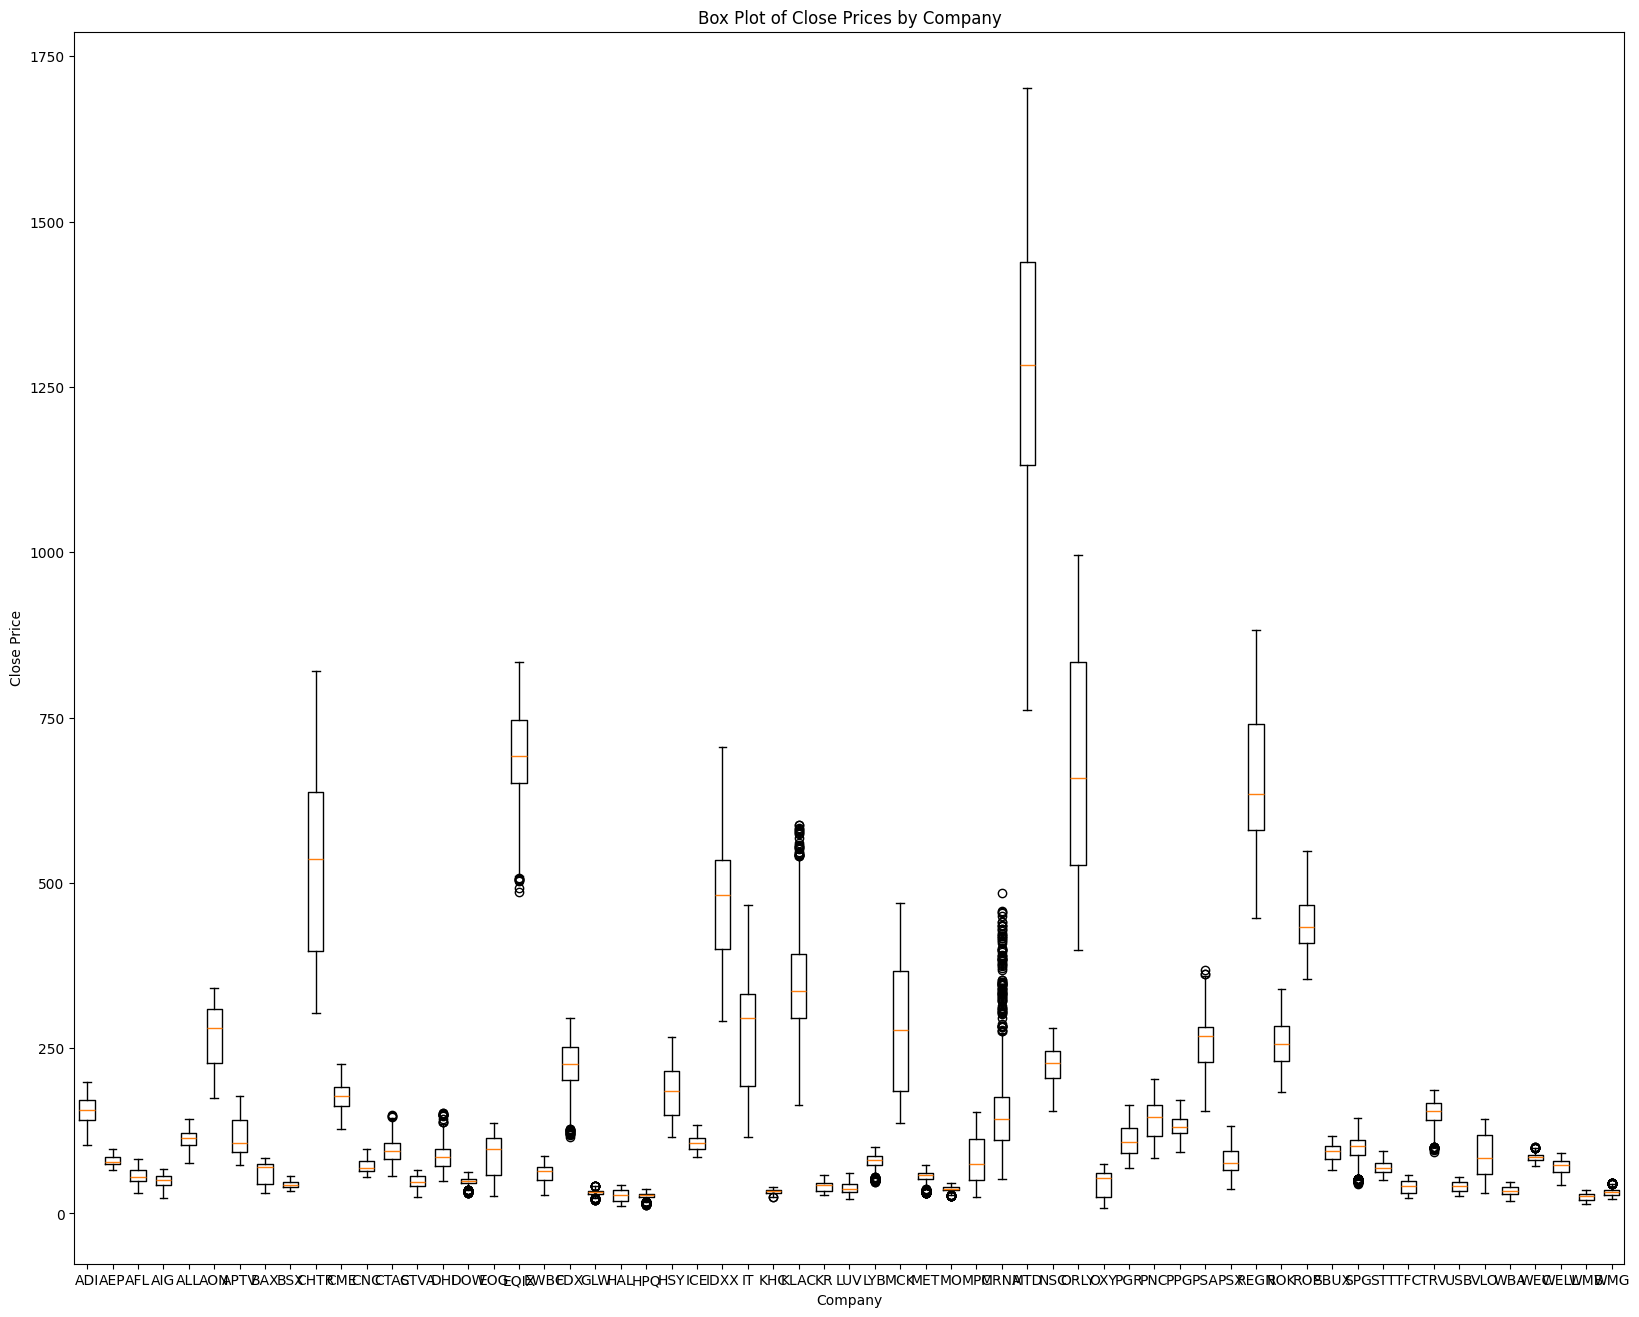

In [60]:
import matplotlib.pyplot as plt
grouped = merge.groupby('Company')

plt.figure(figsize=(20, 16))

for name, group in grouped:
    plt.boxplot(group['Close'], positions=[list(grouped.groups.keys()).index(name)], widths=0.6)

plt.xticks(range(len(grouped)), grouped.groups.keys())

plt.title('Box Plot of Close Prices by Company')
plt.xlabel('Company')
plt.ylabel('Close Price')

plt.show()

In [61]:
# Initialize an empty DataFrame to hold all company data
df = pd.DataFrame()

# Iterate over each company
for company in tickers_with_zero_splits_only:
    ticker = Ticker(company)
    company_info = ticker.asset_profile
    if company in company_info:
        info = company_info[company]
        data = {
            'name': company,
            'longBusinessSummary': info.get('longBusinessSummary', 'N/A'),
        }
        df_temp = pd.DataFrame([data])
        df = pd.concat([df, df_temp], ignore_index=True)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
os.environ['PYTHONWARNINGS'] = 'ignore'  

warnings.filterwarnings('ignore')

logging.getLogger('transformers').setLevel(logging.ERROR)
logging.getLogger('torch').setLevel(logging.ERROR)

transformers_logging.set_verbosity_error()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


def process_summary(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
    sentence_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    sentence_embedding = (sentence_embedding - sentence_embedding.min()) / (sentence_embedding.max() - sentence_embedding.min())
    sentence_embedding = sentence_embedding.reshape(1, -1)
    rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=10, random_state=42)
    transformed_embedding = rbm.fit_transform(sentence_embedding)
    return transformed_embedding.flatten()

embeddings = []
for i in range(len(df)):
    text = df['longBusinessSummary'][i]
    embedding = process_summary(text)
    embeddings.append(embedding)

result_df = pd.DataFrame(embeddings, columns=[f'feature_{i}' for i in range(100)])
result_df.insert(0, 'name', df['name'])

result_df

,name,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,ORLY,0.000047,0.000009,0.000028,0.000022,0.000037,0.000073,0.000029,0.000050,0.000108,...,0.000048,0.000041,0.000058,0.000048,0.000032,0.000023,0.000046,0.000056,0.000027,0.000031
1,EOG,0.000031,0.000006,0.000018,0.000015,0.000024,0.000050,0.000019,0.000032,0.000073,...,0.000033,0.000027,0.000039,0.000033,0.000021,0.000015,0.000031,0.000038,0.000018,0.000021
2,USB,0.000027,0.000005,0.000016,0.000012,0.000022,0.000044,0.000017,0.000028,0.000065,...,0.000029,0.000024,0.000034,0.000029,0.000019,0.000013,0.000027,0.000033,0.000016,0.000018
3,ADI,0.000033,0.000006,0.000020,0.000015,0.000027,0.000054,0.000020,0.000036,0.000080,...,0.000035,0.000029,0.000042,0.000034,0.000023,0.000016,0.000033,0.000041,0.000019,0.000023
4,NSC,0.000094,0.000020,0.000058,0.000045,0.000077,0.000144,0.000059,0.000099,0.000202,...,0.000095,0.000081,0.000111,0.000094,0.000066,0.000046,0.000092,0.000113,0.000056,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,VLO,0.000025,0.000005,0.000015,0.000011,0.000020,0.000041,0.000015,0.000026,0.000061,...,0.000028,0.000022,0.000032,0.000026,0.000018,0.000012,0.000025,0.000031,0.000015,0.000017
57,WMB,0.000030,0.000006,0.000018,0.000014,0.000024,0.000050,0.000018,0.000032,0.000070,...,0.000032,0.000027,0.000038,0.000032,0.000021,0.000014,0.000030,0.000038,0.000018,0.000020
58,LYB,0.000030,0.000006,0.000018,0.000014,0.000024,0.000049,0.000018,0.000031,0.000072,...,0.000032,0.000026,0.000037,0.000031,0.000021,0.000014,0.000030,0.000036,0.000017,0.000020
59,HSY,0.000027,0.000005,0.000016,0.000012,0.000022,0.000042,0.000016,0.000027,0.000063,...,0.000028,0.000023,0.000033,0.000027,0.000018,0.000013,0.000026,0.000033,0.000015,0.000018


In [62]:
merged_df = pd.merge(merge.reset_index(), result_df, left_on='Company', right_on='name')
merged_df.set_index('Date', inplace=True)
merged_df = merged_df.sort_values(by='Date', ascending=True)
merged_df.drop(columns=['name','index','Dividends','Stock Splits'], inplace=True)
next_day_close = merged_df['Next_Day_Close']
merged_df = merged_df.drop('Next_Day_Close', axis=1)
merged_df['Next_Day_Close'] = next_day_close
merged_df

,Open,High,Low,Close,Volume,Company,mv100,mv50,mv9,bb_bbm,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,Next_Day_Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-26,413.079987,416.190002,397.690002,399.119995,851000,ORLY,379.816300,355.716600,403.420000,396.376500,...,0.000041,0.000058,0.000048,0.000032,0.000023,0.000046,0.000056,0.000027,0.000031,415.279999
2020-05-26,72.722781,73.015134,70.877307,71.041756,8422200,SBUX,71.031798,64.761853,69.560703,68.986896,...,0.000014,0.000020,0.000016,0.000011,0.000007,0.000016,0.000020,0.000009,0.000011,71.809174
2020-05-26,92.451234,93.953145,91.978407,92.710823,1696800,PPG,95.063895,81.491232,85.444355,84.176034,...,0.000013,0.000018,0.000015,0.000010,0.000007,0.000015,0.000018,0.000008,0.000010,94.889534
2020-05-26,156.999311,159.374968,155.778493,158.772797,1100600,PSA,168.024992,155.344249,150.691706,151.264722,...,0.000050,0.000071,0.000060,0.000039,0.000029,0.000057,0.000075,0.000033,0.000039,162.476486
2020-05-26,30.337616,31.871833,30.216266,31.291082,10389500,MET,34.172941,27.351549,28.528914,29.195359,...,0.000026,0.000037,0.000030,0.000020,0.000014,0.000029,0.000036,0.000017,0.000020,32.010517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,37.748447,38.070834,37.523754,37.904755,2368800,BAX,36.043037,34.450598,37.736507,36.696786,...,0.000021,0.000030,0.000025,0.000017,0.000011,0.000024,0.000030,0.000014,0.000016,37.767986
2023-12-28,78.064552,78.986273,77.957826,78.908653,2164900,AEP,75.126328,75.890179,78.663937,78.432752,...,0.000020,0.000029,0.000024,0.000016,0.000011,0.000023,0.000029,0.000013,0.000015,78.801926
2023-12-28,35.886249,36.073309,35.581043,35.649960,4179200,HAL,38.411122,37.246968,35.931100,35.455332,...,0.000027,0.000039,0.000032,0.000022,0.000015,0.000031,0.000038,0.000018,0.000021,35.590893


In [63]:
print(merged_df.columns.tolist())

['Open', 'High', 'Low', 'Close', 'Volume', 'Company', 'mv100', 'mv50', 'mv9', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'rsi14', 'rsimv9', 'rsi50', 'wd', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'MF Multiplier', 'MF Volume', 'f34', 'f35', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 

In [64]:
filename='US_daily_2.CSV'
merged_df.to_csv(filename)